# 📊 W05 Lab: Matplotlib, Seaborn & Your First Visualisations

**DS105W W05 LAB – Data for Data Science (Winter Term 2025/2026)**

<div style="font-family: system-ui; padding: 20px 30px 20px 20px; background-color: #FFFFFF; color: #212121; border-left: 8px solid #ED9255; border-radius: 8px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1);max-width:600px;">

**Lab Practice Notebook**

- 📅 Date: 20 February 2026
- 👤 Name: [Your name here] (🧑‍✈️ Pilot/Copilot)
- 👤 Name: [Your partner's name here] (🙋 Copilot/Pilot)
- 🎯 Purpose: Learn matplotlib scaffolding and create seaborn visualisations

<span style="display:block;line-height:1.15em;color:#666666;font-size:0.9em;">

🥅 **Learning Goals**

 i) Set up matplotlib and seaborn with proper imports and configuration,
 ii) Understand the role of figure and axes objects in matplotlib,
 iii) Create bar plots, line charts, and scatter plots with seaborn,
 iv) Apply the plot_df pattern and write narrative titles,
 v) Export plots as PNG and SVG files.

</span>

</div>


## 📋 Before You Start

- You should have attended or watched the 🖥️ [W05 Lecture](https://lse-dsi.github.io/DS105/2025-2026/winter-term/weeks/week05/lecture.html)
- Find a pair-programming partner
- Negotiate who will be 🧑‍✈️ Pilot (typing) and 🙋 Copilot (guiding) for Tasks 01-02
- You'll swap roles for Task 03!


⚙️ **Importing libraries**

`matplotlib.pyplot` is the plotting engine. `seaborn` is a higher-level library that uses matplotlib underneath. We import both because seaborn creates the plots and matplotlib controls the canvas.


In [93]:
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print("✅ Libraries loaded successfully!")

matplotlib version: 3.10.3
seaborn version: 0.13.2
✅ Libraries loaded successfully!


If you get an error, run `pip install matplotlib seaborn` in your Terminal.

In [94]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [95]:
os.makedirs('figures', exist_ok=True)


## Task 01: Matplotlib Scaffolding (20 min)

Before creating any plots, you need to understand the infrastructure.
Work through each step individually.


### Step 1: What is `plt.figure()`?

`plt.figure()` creates a blank canvas. `figsize=(width, height)` sets dimensions in inches. Every plot starts with a figure.

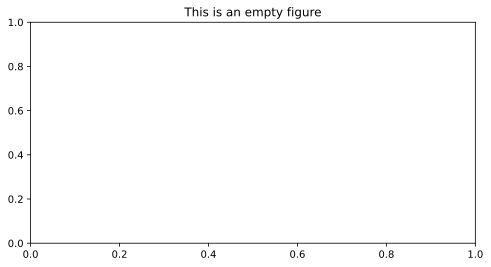

In [96]:
plt.figure(figsize=(8, 4))
plt.title("This is an empty figure")
plt.show()

🎯 **ACTION:** Try changing the figsize to `(4, 4)` and `(12, 3)`. What happens?

In [97]:
# Try (4, 4) here

In [98]:
# Try (12, 3) here

### Step 2: What is `plt.tight_layout()`?

This adjusts spacing so labels and titles don't get clipped. Always include it before `plt.show()`.

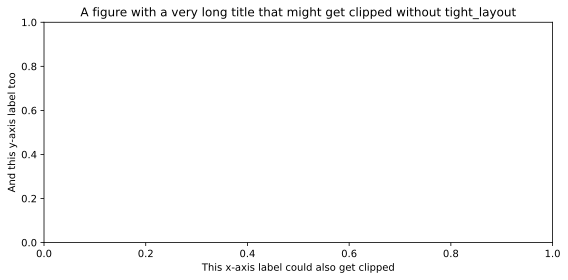

In [99]:
plt.figure(figsize=(8, 4))
plt.title("A figure with a very long title that might get clipped without tight_layout")
plt.xlabel("This x-axis label could also get clipped")
plt.ylabel("And this y-axis label too")
plt.tight_layout()
plt.show()

### Step 3: What is `plt.savefig()`?

Save **before** `plt.show()`, because `show()` "consumes" the plot. `dpi=300` sets resolution for PNG. `bbox_inches='tight'` prevents clipping in the saved file.

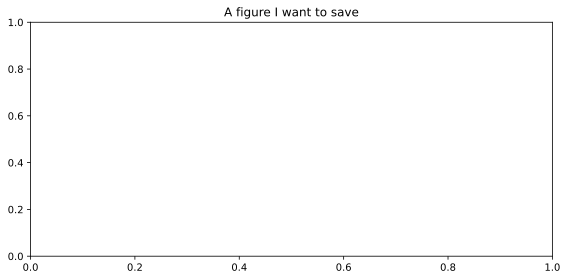

In [100]:
plt.figure(figsize=(8, 4))
plt.title("A figure I want to save")
plt.tight_layout()
plt.savefig('figures/test-plot.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/test-plot.svg', bbox_inches='tight')
plt.show()

🎯 **ACTION:** Open both saved files in your file browser. Which one scales better when you zoom in?

### Step 4 (Optional): What are axes?

When you see `fig, ax = plt.subplots()` in documentation or AI output, `fig` is the canvas and `ax` is the individual plot area. For single plots (which is all you need for MP1), `plt.figure()` is enough.

```python

```

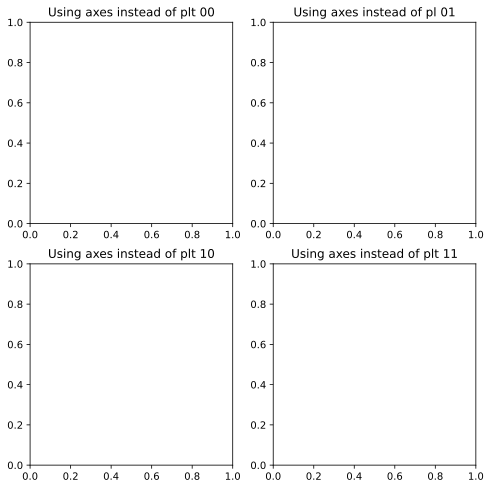

In [101]:
fig, ax = plt.subplots(2,2,figsize=(8, 8))
ax[0][0].set_title("Using axes instead of plt 00")

ax[0][1].set_title("Using axes instead of pl 01")

ax[1][0].set_title("Using axes instead of plt 10")

ax[1][1].set_title("Using axes instead of plt 11")
plt.show()


## Task 02: Seaborn Essentials (30 min)

Every plot follows the same workflow:

1. **Prepare** a `plot_df` with exactly the columns you need
2. **Inspect** it with `print(plot_df)`
3. **Plot** with seaborn
4. **Title** with a narrative that states your finding
5. **Save** to `figures/`


### Load and prepare the data

In [102]:
df = pd.read_csv('data/london_paris_weather.csv')
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month

print(f"✅ Loaded {len(df)} rows")
print(f"Columns: {df.columns.tolist()}")
df.head()

✅ Loaded 14610 rows
Columns: ['city', 'time', 'temperature_2m_max', 'rain_sum', 'month']


,city,time,temperature_2m_max,rain_sum,month
0,London,2006-01-01,6.4,1.3,1
1,London,2006-01-02,5.9,0.0,1
2,London,2006-01-03,7.7,3.1,1
3,London,2006-01-04,7.0,0.0,1
4,London,2006-01-05,2.7,0.0,1


### Teaching Moment: Bar plot (follow along)

We'll build this one together to demonstrate the `plot_df` pattern. Watch how we prepare the data first, inspect it, then plot.

**Step 1: Prepare `plot_df`.** Filter to London, group by month, sum the rainfall. Note: `.query("city == 'London'")` is shorthand for `df[df['city'] == 'London']`.

In [103]:
plot_df = (
    df.query("city == 'London'")
    .groupby('month')['rain_sum']
    .sum()
    .reset_index()
)

print(plot_df)

    month  rain_sum
0       1    1127.5
1       2     979.8
2       3     915.5
3       4     798.5
4       5    1171.1
5       6    1177.5
6       7    1256.6
7       8    1187.6
8       9    1007.2
9      10    1345.1
10     11    1329.7
11     12    1172.7


**Step 2: Plot with seaborn.** Create the figure, plot, add labels, then show.

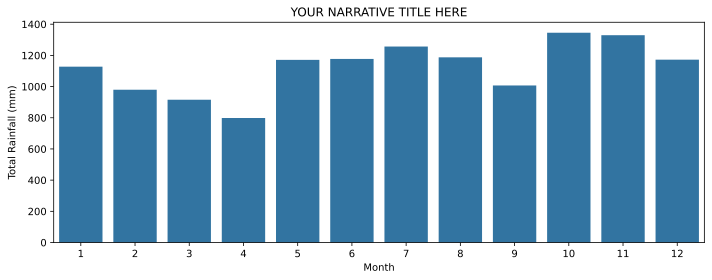

In [104]:
plt.figure(figsize=(10, 4))
sns.barplot(data=plot_df, x='month', y='rain_sum')
plt.title("YOUR NARRATIVE TITLE HERE")  # ← Replace this!
plt.xlabel("Month")
plt.ylabel("Total Rainfall (mm)")
plt.tight_layout()
plt.show()

**Step 3: Write a narrative title.** Look at the bars. Which months have the most rainfall? Replace the placeholder title above with a sentence that states your finding (e.g. "London receives twice as much rain in October as in March").

**Step 4: Save.** Always save before `plt.show()`. Re-run with `savefig` added:

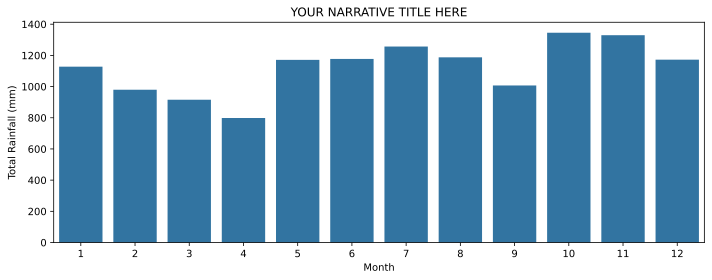

✅ Saved to figures/


In [105]:
plt.figure(figsize=(10, 4))
sns.barplot(data=plot_df, x='month', y='rain_sum')
plt.title("YOUR NARRATIVE TITLE HERE")  # ← Same title as above
plt.xlabel("Month")
plt.ylabel("Total Rainfall (mm)")
plt.tight_layout()
plt.savefig('figures/london-monthly-rainfall.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/london-monthly-rainfall.svg', bbox_inches='tight')
plt.show()

print("✅ Saved to figures/")

### Seaborn Quick Reference

| Plot Type | When to Use | Code Pattern |
|-----------|------------|--------------|
| `sns.barplot()` | Compare categories | `sns.barplot(data=plot_df, x='category', y='value')` |
| `sns.lineplot()` | Show trends over time | `sns.lineplot(data=plot_df, x='time', y='value')` |
| `sns.scatterplot()` | Show relationships | `sns.scatterplot(data=plot_df, x='var1', y='var2')` |



## Task 03: Pilot/Copilot Plots (30 min)

**⚠️ SWAP ROLES!** The person who was NOT typing becomes the 🧑‍✈️ Pilot.

Follow the same workflow you just saw: prepare `plot_df`, inspect, plot, narrative title, save. Discuss each step with your partner before writing code.


### Plot A: Line chart

**Question:** How has London's average maximum temperature changed year by year?


In [106]:
# Prepare plot_df
df2 = pd.read_csv('data/london_paris_weather.csv')
df2['time'] = pd.to_datetime(df2['time'])
df2['year'] = df2['time'].dt.year


In [107]:
# Inspect it
print(f"✅ Loaded {len(df)} rows")
print(f"Columns: {df.columns.tolist()}")

✅ Loaded 14610 rows
Columns: ['city', 'time', 'temperature_2m_max', 'rain_sum', 'month']


    year  temperature_2m_max  temp_pct_change
0   2006           14.675342              NaN
1   2007           14.390685        -1.939699
2   2008           13.793443        -4.150201
3   2009           13.921370         0.927450
4   2010           12.749589        -8.417137
5   2011           14.774795        15.884477
6   2012           13.512295        -8.544954
7   2013           13.309589        -1.500160
8   2014           14.978356        12.538082
9   2015           14.336986        -4.281978
10  2016           14.292896        -0.307527
11  2017           14.728219         3.045730
12  2018           15.413151         4.650471
13  2019           14.950411        -3.002240
14  2020           15.505464         3.712631
15  2021           14.340548        -7.512942
16  2022           16.053973        11.948111
17  2023           15.516986        -3.344881
18  2024           15.281967        -1.514592
19  2025           16.009041         4.757724


<function matplotlib.pyplot.show(close=None, block=None)>

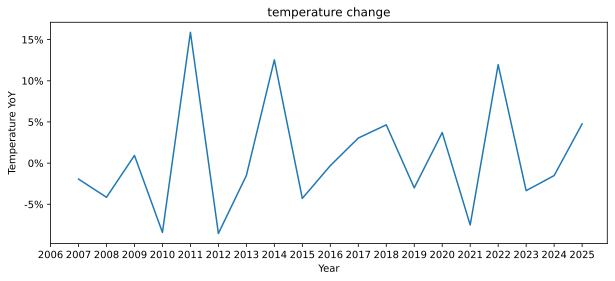

In [108]:
# Plot, title, save
plot_df2 = (df2.query("city == 'London'").groupby('year')['temperature_2m_max'].mean().reset_index())
plot_df2['temp_pct_change'] = plot_df2['temperature_2m_max'].pct_change() * 100
print(plot_df2)
plt.figure(figsize=(10,4))
sns.lineplot(data = plot_df2, x = 'year', y = 'temp_pct_change')
plt.title("temperature change")
plt.xlabel("Year")
plt.ylabel("Temperature YoY")
plt.tight_layout
plt.xticks(plot_df2['year'])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.savefig('figures/change-london-monthly-rainfall.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/change-london-monthly-rainfall.svg', bbox_inches='tight')
plt.show

💭 **Personal Reflection:**

What does the trend tell you? Write a narrative title that states the finding.

- [*Write your notes here*]

### Plot B: Scatter plot

**Question:** Is there a relationship between temperature and rainfall in London?

**Hints:**

- Filter to London only
- Select `temperature_2m_max` and `rain_sum` columns
- Use `sns.scatterplot()` with `alpha=0.3` (thousands of points overlap)
- Save to `figures/london-temp-vs-rain.png` and `.svg`

In [109]:
# Prepare plot_df
df3 = pd.read_csv('data/london_paris_weather.csv')


<function matplotlib.pyplot.show(close=None, block=None)>

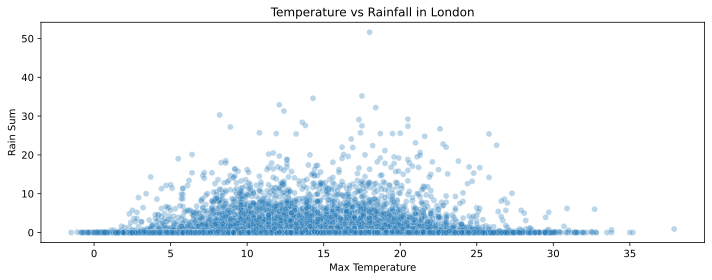

In [110]:
# Plot, title, save
plot_df3 = df3.query("city == 'London'")
plt.figure(figsize=(10, 4))
sns.scatterplot(data=plot_df3, x='temperature_2m_max', y='rain_sum', alpha=0.3)
plt.title("Temperature vs Rainfall in London")
plt.xlabel("Max Temperature")
plt.ylabel("Rain Sum")
plt.tight_layout()
plt.savefig('figures/scatter-london-monthly-rainfall.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/scatter-london-monthly-rainfall.svg', bbox_inches='tight')
plt.show



💭 **Personal Reflection:**

What pattern do you see? Does higher temperature mean more or less rain?

- [*Write your notes here*]

## Task 04: Challenge Plot (remaining time)

Still in your 🧑‍✈️ Pilot / 🙋 Copilot pairs, create ONE visualisation that answers:

**"How do London and Paris compare in their seasonal temperature patterns?"**

**Requirements:**

1. Prepare a `plot_df` (the Copilot guides what to aggregate)
2. Choose an appropriate plot type (discuss before coding!)
3. Write a narrative title that states your finding
4. Export as both PNG and SVG to `figures/`
5. In the markdown cell below, write 2-3 sentences explaining your plot type choice and what your title communicates

In [123]:
df4 = pd.read_csv('data/london_paris_weather.csv')
df4['time'] = pd.to_datetime(df4['time'])
df4['month'] = df4['time'].dt.month
plot_df4 = (df.groupby(['city', 'month'])['temperature_2m_max'].mean().reset_index())
plot_df4.columns = ['city', 'month', 'temperature_2m_max']
print(plot_df4)

      city  month  temperature_2m_max
0   London      1            7.373226
1   London      2            8.333451
2   London      3           10.649032
3   London      4           14.049167
4   London      5           17.093710
5   London      6           20.325667
6   London      7           22.283387
7   London      8           21.533871
8   London      9           19.163500
9   London     10           15.245806
10  London     11           10.780667
11  London     12            8.317581
12   Paris      1            7.057581
13   Paris      2            8.761062
14   Paris      3           12.000161
15   Paris      4           15.892333
16   Paris      5           19.015806
17   Paris      6           22.711833
18   Paris      7           24.920484
19   Paris      8           24.445161
20   Paris      9           21.313167
21   Paris     10           16.749032
22   Paris     11           11.185833
23   Paris     12            7.937742


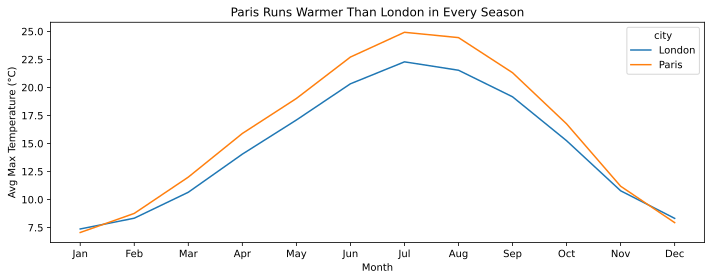

In [126]:
# Create the plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=plot_df4, x='month', y='temperature_2m_max', hue='city')
plt.title("Paris Runs Warmer Than London in Every Season")
plt.xlabel("Month")
plt.ylabel("Avg Max Temperature (°C)")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()


In [127]:
# Save the plot
plt.savefig('figures/london-vs-paris-seasonal.png')
plt.savefig('figures/london-vs-paris-seasonal.svg')
plt.show()

<Figure size 640x480 with 0 Axes>

**Your explanation:**

> _[Double-click this cell and write your explanation]_

### Optional Stretch Goal: FacetGrid

If you finish early, try using seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to create side-by-side plots. Attempt it based on the docs alone before consulting other sources.

In [114]:
# Optional: FacetGrid attempt

---
## Wrap-Up

You now have two paths for Mini-Project 1 NB03 insights:

- **Styled DataFrames** (learned in yesterday's lecture): `.style.format()`, `.background_gradient()`, `.set_caption()`
- **Seaborn plots** (learned today): `sns.barplot()`, `sns.lineplot()`, `sns.scatterplot()`
- You can mix: one styled DataFrame + one seaborn plot

**MP1 deadline:** Thursday 26 Feb at 8pm

**Reading Week drop-in sessions** available (check ✋ [Contact Hours](https://lse-dsi.github.io/DS105/2025-2026/winter-term/contact-hours.html))